In [9]:
# SU Women's Lacrosse Stats Analysis: 2023 vs 2024 by Apoorva Mahajan

#!pip install openpyxl
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check current working directory
print("Current Working Directory:", os.getcwd())

# Load Excel files
file_2023 = '/home/jovyan/library/Task_05 Descriptive Stats LLM/2023_SU_Womens_Lacrosse_Cumulative_Statistics.xlsx'
file_2024 = '/home/jovyan/library/Task_05 Descriptive Stats LLM/2024_SU_Womens_Lacrosse_Cumulative_Statistics.xlsx'

print("File exists:", os.path.exists(file_2023))
print("File exists:", os.path.exists(file_2024))

Current Working Directory: /home/jovyan/library/Task_05 Descriptive Stats LLM
File exists: True
File exists: True


In [17]:
# Load 2023 sheets
player_stats_2023 = pd.read_excel(file_2023, sheet_name='Player Stats', engine='openpyxl')
team_stats_2023 = pd.read_excel(file_2023, sheet_name='Team stats', engine='openpyxl')

# Load 2024 with second row as header
player_stats_2024_raw = pd.read_excel(file_2024, sheet_name='Player Stats', header=1, engine='openpyxl')
team_stats_2024 = pd.read_excel(file_2024, sheet_name='Team stats', engine='openpyxl')

# Assign correct headers manually for 2024
correct_headers = ['#', 'player', 'gp - gs', 'g', 'a', 'pts', 'sh', 'sh%', 'sog', 'sog%', 'gwg',
                   'fpg', 'fps', 'gb', 'to', 'ct', 'dc', 'fouls', 'rc-yc-gc']
player_stats_2024_raw.columns = [col.strip().lower() for col in correct_headers]

# Drop any extra repeated header row and copy safely
player_stats_2024 = player_stats_2024_raw[player_stats_2024_raw['player'].str.lower() != 'player'].copy()

In [18]:
# --- CLEANING & PREP ---
# Normalize column names for 2023
player_stats_2023.columns = player_stats_2023.columns.str.strip().str.lower()

# Print column names to verify alignment
print("2023 columns:", player_stats_2023.columns.tolist())
print("2024 columns:", player_stats_2024.columns.tolist())

# Convert stat columns to numeric where appropriate
numeric_cols = ['g', 'a', 'pts', 'sh', 'sh%', 'sog', 'sog%', 'gwg', 'fpg', 'fps', 'gb', 'to', 'ct', 'dc', 'fouls']
for col in numeric_cols:
    if col in player_stats_2023.columns:
        player_stats_2023[col] = pd.to_numeric(player_stats_2023[col], errors='coerce')
    if col in player_stats_2024.columns:
        player_stats_2024[col] = pd.to_numeric(player_stats_2024[col], errors='coerce')

2023 columns: ['#', 'player', 'gp - gs', 'g', 'a', 'pts', 'sh', 'sh%', 'sog', 'sog%', 'gwg', 'fpg', 'fps', 'gb', 'to', 'ct', 'dc', 'fouls', 'rc-yc-gc']
2024 columns: ['#', 'player', 'gp - gs', 'g', 'a', 'pts', 'sh', 'sh%', 'sog', 'sog%', 'gwg', 'fpg', 'fps', 'gb', 'to', 'ct', 'dc', 'fouls', 'rc-yc-gc']


In [20]:
# --- COMPARATIVE INSIGHTS ---

# Summary function using .agg to get mean and sum
def summarize_team_stats(df, year):
    summary = df[numeric_cols].agg(['mean', 'sum']).T
    summary.columns = [f'{col}_{year}' for col in summary.columns]
    return summary

team_summary_2023 = summarize_team_stats(player_stats_2023, '2023')
team_summary_2024 = summarize_team_stats(player_stats_2024, '2024')

# Combine and display summaries
team_comparison = pd.concat([team_summary_2023, team_summary_2024], axis=1)
print("\n--- Team Comparison Summary ---")
print(team_comparison)


--- Team Comparison Summary ---
       mean_2023  sum_2023  mean_2024  sum_2024
g      24.305556   875.000  24.527778   883.000
a      13.777778   496.000  11.333333   408.000
pts    38.083333  1371.000  35.861111  1291.000
sh     52.333333  1884.000  55.083333  1983.000
sh%     0.296222    10.664   0.205778     7.408
sog    38.833333  1398.000  39.111111  1408.000
sog%    0.450333    16.212   0.423917    15.261
gwg     1.083333    39.000   1.055556    38.000
fpg     3.472222   125.000   4.861111   175.000
fps     8.250000   297.000  10.361111   373.000
gb     26.250000   945.000  27.916667  1005.000
to     22.750000   819.000  26.583333   957.000
ct     12.222222   440.000  16.388889   590.000
dc     26.055556   938.000  27.750000   999.000
fouls  43.305556  1559.000  27.777778  1000.000


/tmp/ipykernel_315/3953993296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pts', y='player', data=top, palette='viridis')


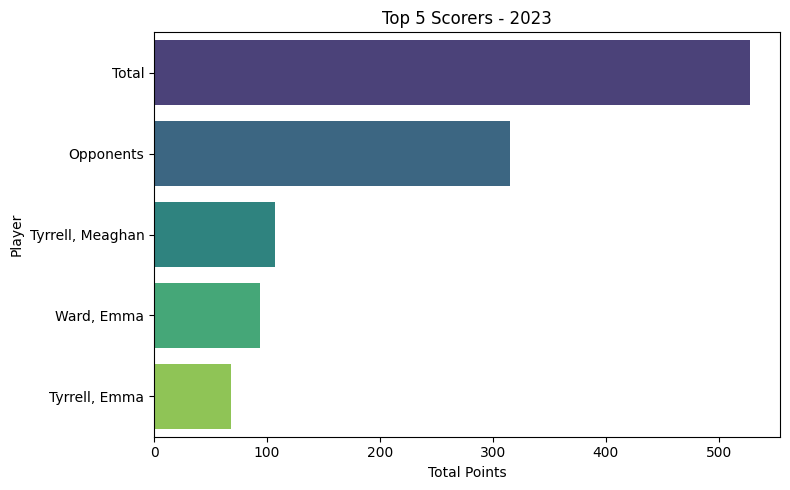

/tmp/ipykernel_315/3953993296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pts', y='player', data=top, palette='viridis')


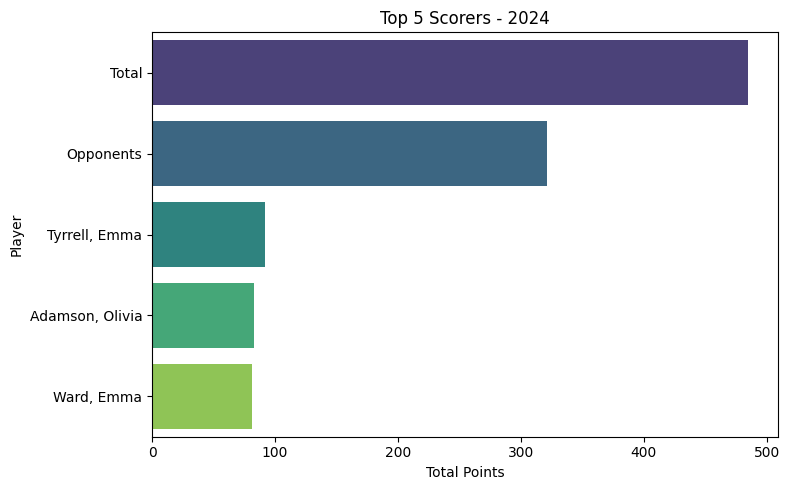

In [24]:
# --- VISUALIZATION ---

# Top 5 scorers per season
def plot_top_scorers(df, year):
    top = df[['player', 'pts']].sort_values(by='pts', ascending=False).head(5)
    sns.barplot(x='pts', y='player', data=top, palette='viridis')
    plt.title(f'Top 5 Scorers - {year}')
    plt.xlabel('Total Points')
    plt.ylabel('Player')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 5))
plot_top_scorers(player_stats_2023, 2023)

plt.figure(figsize=(8, 5))
plot_top_scorers(player_stats_2024, 2024)

/tmp/ipykernel_315/1384909177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2023', '2024'], y=[total_pts_2023, total_pts_2024], palette='coolwarm')


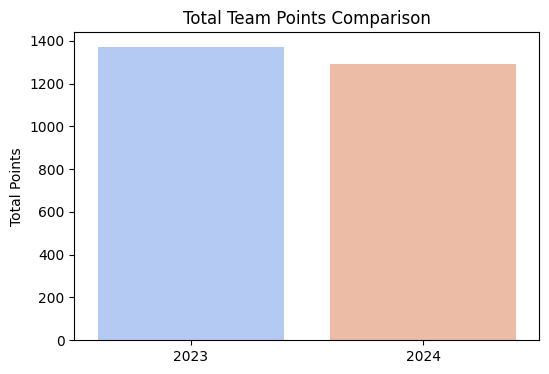

In [25]:
# Compare total team points
total_pts_2023 = player_stats_2023['pts'].sum()
total_pts_2024 = player_stats_2024['pts'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=['2023', '2024'], y=[total_pts_2023, total_pts_2024], palette='coolwarm')
plt.title('Total Team Points Comparison')
plt.ylabel('Total Points')
plt.show()

In [27]:
# --- ADVANCED ANALYSIS ---

# Compare performance improvement for common players
common_players = set(player_stats_2023['player']).intersection(set(player_stats_2024['player']))

improvement = []
for player in common_players:
    pts_2023 = player_stats_2023[player_stats_2023['player'] == player]['pts'].values[0]
    pts_2024 = player_stats_2024[player_stats_2024['player'] == player]['pts'].values[0]
    improvement.append({
        'player': player,
        'pts_2023': pts_2023,
        'pts_2024': pts_2024,
        'change': pts_2024 - pts_2023
    })

improvement_df = pd.DataFrame(improvement).sort_values(by='change', ascending=False)
print("\n--- Player Performance Improvement ---")
print(improvement_df.head())


--- Player Performance Improvement ---
                player  pts_2023  pts_2024  change
2       Rowley, Payton         2        38      36
22     Adamson, Olivia        51        83      32
9       Smith, Natalie        29        54      25
24       Tyrrell, Emma        68        92      24
23  Sweitzer, Savannah        16        33      17


In [28]:
# --- EXPORT RESULTS LOCALLY ---
team_comparison.to_csv('team_stats_comparison.csv', index=True)
improvement_df.to_csv('player_improvement.csv', index=False)